## IMPORTATION DES DONNEES CARROYEES ET AJOUT DE LA COMPOSANTE GEOGRAPHIQUE

 *Le but de ce code est d'importer les données sur le revenu et le niveau de vie des ménages en France*
 
   Ces données ne sont disponibles que de façon agrégée pour des zones géographiques ayant les tailles les plus petites possibles, mais comportant au moins 11 ménages. Cette double contrainte permet d'avoir des données fines, tout en respectant le secret statistique. 
   
   Le territoire France a été découpé en petits carreaux de tailles variables, les plus grands avec 32 km de  côté, et les plus petits 200m.

### 1- Importation des données de filosofi

In [1]:
 pip install py7zr

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from urllib.request import urlopen
import io 
from zipfile import ZipFile

data_url = "https://www.insee.fr/fr/statistiques/fichier/4176281/Filosofi2015_carreaux_niveau_naturel_csv.zip"

# Transformation de l'url des données en données texte lisible
zippedfile = urlopen(data_url).read()

# Le fiichier texte est coverti en fichiers
opened_zipfile = ZipFile(io.BytesIO(zippedfile))

# Les fichiers sont extraits
opened_zipfile.extract(member=opened_zipfile.namelist()[2],path= os. getcwd())

'C:\\Users\\HP\\Filosofi2015_carreaux_niveau_naturel_metropole_csv.7z'

In [3]:
# Extraction du fichier csv final
import py7zr
with py7zr.SevenZipFile("Filosofi2015_carreaux_niveau_naturel_metropole_csv.7z", 
                        'r') as archive:
    archive.extractall()

In [4]:
# Lecture de la base de données des niveaux de vie
import pandas as pd

data = pd.read_csv(archive.filename.split("_csv")[0]+".csv", delimiter=",")

In [7]:
# PREMIERES INFORMATIONS SUR LA BASE
    #1 - Vue globale
data.head(10)

,Id_carr_n,Ind,Men,Men_pauv,Men_1ind,Men_5ind,Men_prop,Men_fmp,Ind_snv,Men_surf,...,Ind_11_17,Ind_18_24,Ind_25_39,Ind_40_54,Ind_55_64,Ind_65_79,Ind_80p,Ind_inc,I_pauv,t_maille
0,CRS3035RES1000mN2034000E4252000,144.0,57.0,9.0,17.0,4.9,33.2,5.0,3352210.9,4874.9,...,9.3,8.1,32.3,23.1,19.7,19.8,5.9,2.1,0,1000
1,CRS3035RES1000mN2034000E4253000,45.0,21.0,3.0,6.0,0.0,12.0,3.0,845666.2,1389.0,...,6.0,2.1,12.0,6.0,3.9,9.0,0.9,1.2,0,1000
2,CRS3035RES1000mN2035000E4252000,81.0,33.8,3.1,11.2,3.1,19.1,9.8,1713668.3,2777.1,...,5.8,6.4,9.7,17.6,16.1,9.8,3.1,3.3,0,1000
3,CRS3035RES1000mN2035000E4253000,46.0,19.9,4.0,7.1,0.9,13.1,1.9,1013579.4,1765.9,...,3.1,3.1,7.9,13.2,8.0,5.1,1.9,0.9,0,1000
4,CRS3035RES1000mN2044000E4253000,91.0,41.9,3.1,18.0,3.0,27.9,4.0,2246566.4,3280.0,...,4.0,3.1,16.9,16.9,14.0,19.1,7.9,0.0,0,1000
5,CRS3035RES1000mN2045000E4253000,72.0,29.0,11.0,12.9,3.9,11.9,3.9,1314913.8,2013.0,...,6.1,5.0,12.9,18.1,5.1,8.0,1.9,1.1,0,1000
6,CRS3035RES1000mN2047000E4243000,21.0,12.0,3.0,6.0,0.9,8.1,0.9,540135.3,1407.9,...,0.9,0.0,0.0,4.0,4.0,8.0,3.0,1.1,0,1000
7,CRS3035RES1000mN2054000E4253000,60.0,24.9,4.9,6.0,2.1,14.1,3.0,1231959.7,2462.1,...,6.0,6.0,4.9,19.2,8.1,6.0,3.1,2.1,0,1000
8,CRS3035RES1000mN2054000E4260000,1907.5,895.0,219.1,381.9,47.1,292.2,105.9,36851261.6,61480.9,...,157.5,90.4,373.1,434.1,227.9,221.9,133.2,21.0,0,1000
9,CRS3035RES1000mN2054000E4261000,246.0,116.0,32.0,46.0,5.0,35.0,14.0,4692112.5,7103.0,...,12.0,16.1,72.0,44.0,18.0,32.0,7.0,3.0,0,1000


In [10]:
    #- Caractéristiques des variables 
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142921 entries, 0 to 142920
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Id_carr_n  142921 non-null  object 
 1   Ind        142921 non-null  float64
 2   Men        142921 non-null  float64
 3   Men_pauv   142921 non-null  float64
 4   Men_1ind   142921 non-null  float64
 5   Men_5ind   142921 non-null  float64
 6   Men_prop   142921 non-null  float64
 7   Men_fmp    142921 non-null  float64
 8   Ind_snv    142921 non-null  float64
 9   Men_surf   142921 non-null  float64
 10  Men_coll   142921 non-null  float64
 11  Men_mais   142921 non-null  float64
 12  Log_av45   142921 non-null  float64
 13  Log_45_70  142921 non-null  float64
 14  Log_70_90  142921 non-null  float64
 15  Log_ap90   142921 non-null  float64
 16  Log_inc    142921 non-null  float64
 17  Log_soc    142921 non-null  float64
 18  Ind_0_3    142921 non-null  float64
 19  Ind_4_5    142921 non-n

In [9]:
data.describe()

,Ind,Men,Men_pauv,Men_1ind,Men_5ind,Men_prop,Men_fmp,Ind_snv,Men_surf,Men_coll,...,Ind_11_17,Ind_18_24,Ind_25_39,Ind_40_54,Ind_55_64,Ind_65_79,Ind_80p,Ind_inc,I_pauv,t_maille
count,142921.000000,142921.000000,142921.000000,142921.000000,142921.000000,142921.000000,142921.000000,1.429210e+05,1.429210e+05,142921.000000,...,142921.000000,142921.000000,142921.000000,142921.000000,142921.000000,142921.000000,142921.000000,142921.000000,142921.000000,142921.000000
mean,440.030268,189.836740,26.628798,63.916494,13.564019,111.554105,20.081176,9.915979e+06,1.649677e+04,81.453188,...,38.216948,24.537172,80.850675,89.849518,55.506004,57.685971,24.205273,9.816569,0.000357,1508.716004
std,1340.169403,599.783099,101.600309,236.403297,46.631815,314.575821,71.323038,3.007951e+07,4.793861e+04,399.357504,...,115.628934,79.181603,261.731971,267.880250,167.338328,183.865965,81.677161,31.464917,0.035781,1224.362136
min,12.000000,10.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750614e+05,3.399000e+02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,71.500000,29.200000,3.000000,7.000000,1.900000,22.100000,2.000000,1.547329e+06,3.151100e+03,0.000000,...,5.900000,3.000000,10.100000,14.900000,10.000000,10.000000,3.800000,1.000000,0.000000,1000.000000
50%,156.000000,64.000000,7.000000,16.100000,4.100000,46.700000,5.000000,3.459699e+06,6.525000e+03,2.700000,...,13.300000,7.900000,24.800000,32.900000,21.100000,21.000000,8.100000,3.100000,0.000000,1000.000000
75%,381.000000,161.100000,18.200000,47.000000,11.000000,106.000000,15.000000,8.639900e+06,1.505190e+04,27.000000,...,33.500000,20.500000,67.000000,79.200000,49.000000,49.900000,20.000000,8.800000,0.000000,2000.000000
max,191932.500000,89976.800000,11101.900000,35064.500000,4876.200000,57953.400000,9093.100000,4.203147e+09,8.228394e+06,35958.000000,...,15722.700000,10387.300000,29667.600000,38211.600000,27065.900000,31131.200000,13562.500000,4806.500000,9.000000,32000.000000


*  Le fichier semble ne pas contenir de valeurs manquantes. Un graphique permettra d'en avoir la confirmation

In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

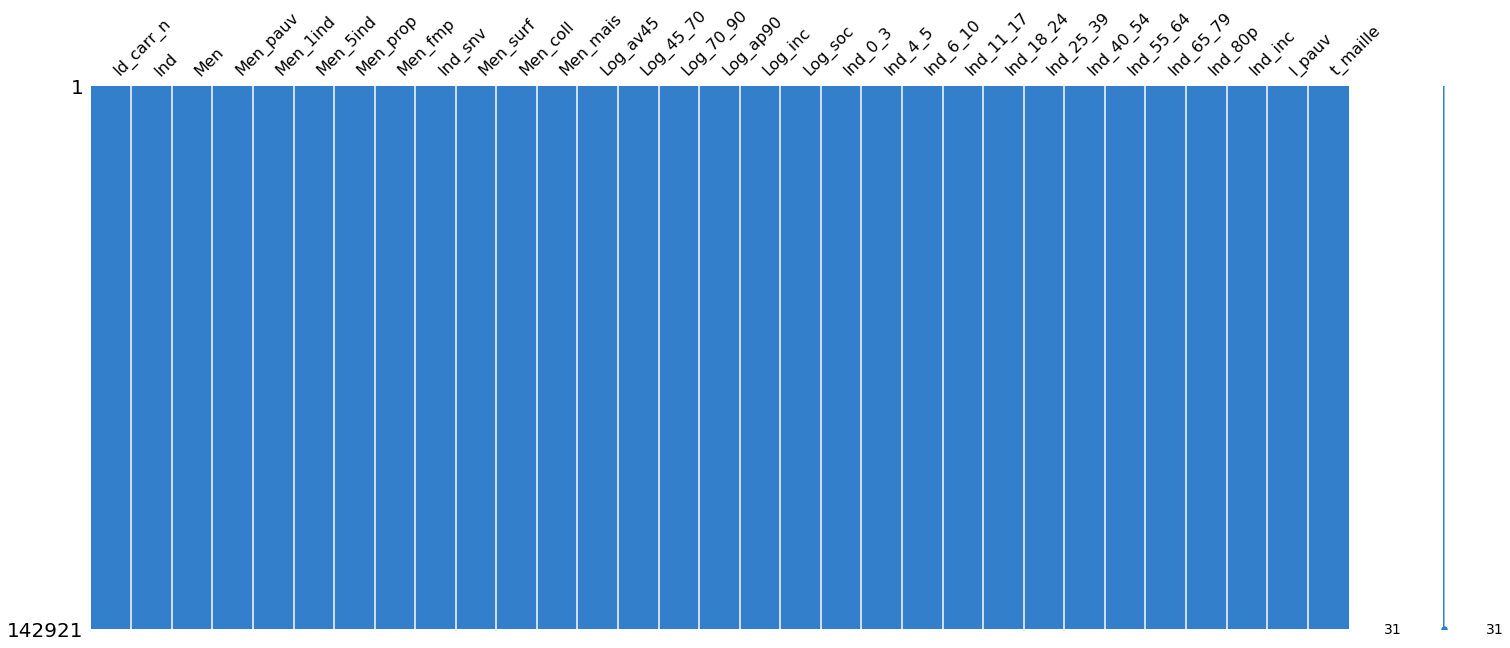

In [11]:
import seaborn as sns
import missingno as msno
%matplotlib inline

msno.matrix(data, color=(0.2,0.5,0.8))

### 2- Vue globale de quelques variables

* Taille en mètres des carreaux

<AxesSubplot:xlabel='t_maille', ylabel='count'>

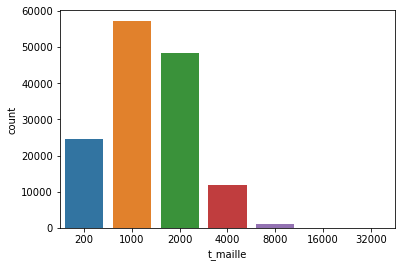

In [12]:
# La variable t_mail : tailles en mètres des carreaux
sns.countplot(data=data, x="t_maille")

* Nombre d'individus du carreau

<AxesSubplot:xlabel='Ind', ylabel='count'>

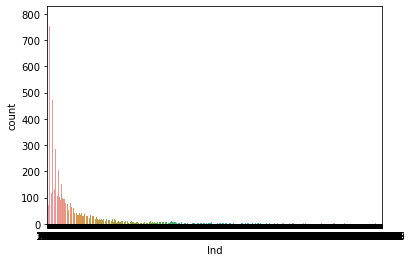

In [14]:
# La variable "Ind" renvoie à ce nombre
sns.countplot(data=data, x="Ind" )

<AxesSubplot:xlabel='Ind'>

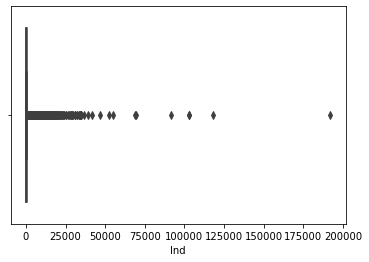

In [15]:
sns.boxplot(data=data, x="Ind")

*  Nombre de ménages par carreau

<AxesSubplot:xlabel='Men', ylabel='count'>

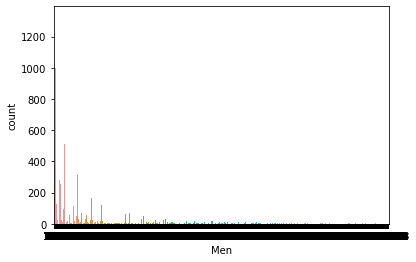

In [16]:
sns.countplot(data=data, x="Men")

<AxesSubplot:xlabel='Men'>

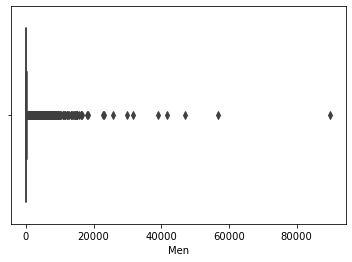

In [28]:
sns.boxplot(data=data, x="Men")

*  Nombre de ménages pauvres

<AxesSubplot:xlabel='Men_pauv', ylabel='count'>

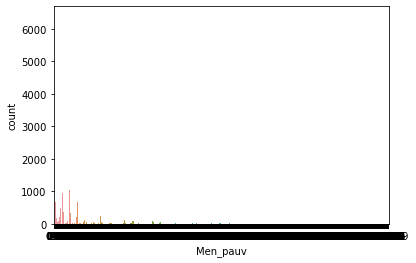

In [30]:
sns.countplot(data=data, x="Men_pauv")

<AxesSubplot:xlabel='Men_pauv'>

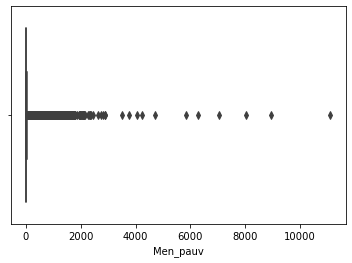

In [31]:
sns.boxplot(data=data, x="Men_pauv")

In [ ]:
# Distributions des autres variables
 ''''   n_cols=3
    n_rows = (data.shape[1]-5)-10//n_cols + 1
    cols = data.columns[5:]
    data2 = data[cols]
    # Create the subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 20))
    for i, column in enumerate(cols,1):
        sns.histplot(data2[column], ax=axes[i // n_cols, i % n_cols]).set_title(column)
 ''''
# code gourmand en temps et mémoire 

A ce stade, le dataframe ne comprend pas de composante géographique. Cette dernière est néanmoins cachée dans la variable *Id_carr_n*  qui donne les coordonnées Nord et Est du coin inférieur gauche de chaque carreau dans le système Lambert-93

Dans la suite on ajoute à notre base cette composante géographique en utilisant cette information

In [ ]:
# Envoi de la section géographique des données dans un autre 
# data  frame

In [24]:
data[data.columns[0]].to_csv("Carreaux.csv", index=False)